<a href="https://colab.research.google.com/github/pouriazzz/jupyter_files/blob/main/xceptiontrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# train_path = "/content/drive/MyDrive/RGBS/Train"
# test_path = "/content/drive/MyDrive/RGBS/Test"
# validation_path = "/content/drive/MyDrive/RGBS/Validation"
train_path = "/content/drive/MyDrive/RGBS/Train"
test_path = "/content/drive/MyDrive/RGBS/Test"
validation_path = "/content/drive/MyDrive/RGBS/Validation"

# train_path = "E:\\RGBS\\RGBS\\Train"
# test_path = "E:\\RGBS\\RGBS\\Test"
# validation_path = "E:\\RGBS\\RGBS\\Validation"

In [3]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import os
import numpy as np

In [4]:
test = keras.utils.image_dataset_from_directory(
                          directory=test_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False

)

Found 2482 files belonging to 2 classes.


In [5]:
train = keras.utils.image_dataset_from_directory(
                          directory=train_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False

)

Found 8715 files belonging to 2 classes.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
validation = keras.utils.image_dataset_from_directory(
                          directory=validation_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False

)

Found 1240 files belonging to 2 classes.


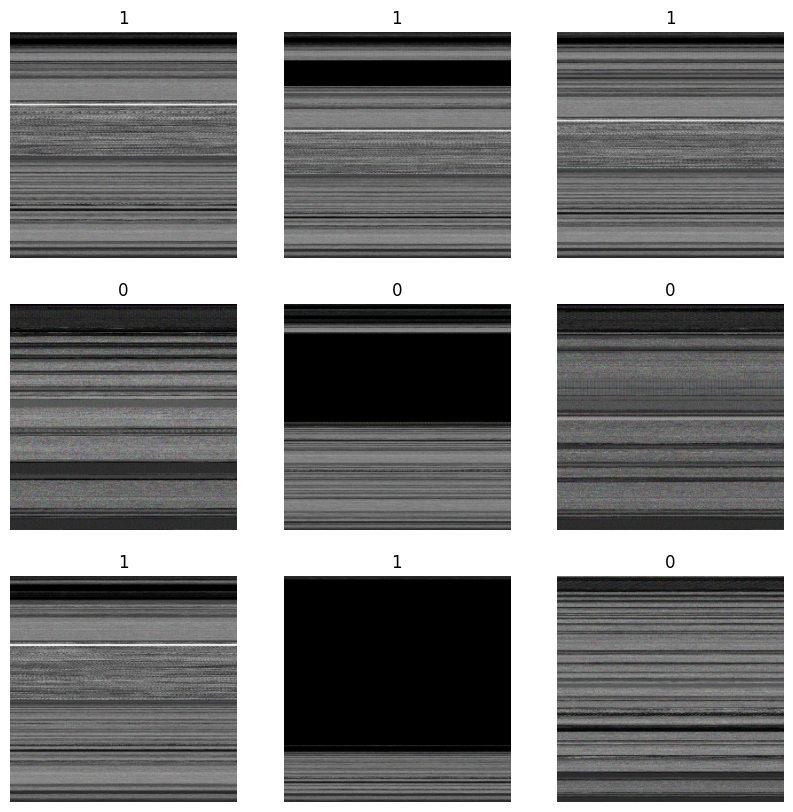

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
test = test.map(process)

In [ ]:
# from keras import regularizers


# model = Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),padding="same", activation="relu", input_shape=(256,256,3)))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(64,activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation="sigmoid"))

# model.summary()




In [8]:
flatten_layer = Flatten()
# dense_layer_1 = Dense(50, activation='relu')
# dense_layer_2 = Dense(20, activation='relu')
prediction_layer = Dense(1, activation='sigmoid')
from tensorflow.keras.applications.xception import Xception
base_model = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling="avg",
    classifier_activation="sigmoid",
)
base_model.trainable = True

model = Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])
model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 20863529 (79.59 MB)
Trainable params: 20809001 (79.38 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import EarlyStopping
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [11]:
  history = model.fit(train, epochs=25, validation_data= test, batch_size = 32, callbacks = [es])

Epoch 1/25
273/273 [==============================] - 2631s 10s/step - loss: 0.2331 - accuracy: 0.9105 - val_loss: 0.3557 - val_accuracy: 0.8493
Epoch 2/25
273/273 [==============================] - 171s 621ms/step - loss: 0.1243 - accuracy: 0.9489 - val_loss: 0.2405 - val_accuracy: 0.9134
Epoch 3/25
273/273 [==============================] - 178s 647ms/step - loss: 0.0698 - accuracy: 0.9731 - val_loss: 0.3376 - val_accuracy: 0.9271
Epoch 4/25
273/273 [==============================] - 171s 623ms/step - loss: 0.0431 - accuracy: 0.9849 - val_loss: 0.3370 - val_accuracy: 0.9202
Epoch 5/25
273/273 [==============================] - 171s 621ms/step - loss: 0.0418 - accuracy: 0.9857 - val_loss: 0.3172 - val_accuracy: 0.9283
Epoch 6/25
273/273 [==============================] - 171s 622ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.3089 - val_accuracy: 0.9198
Epoch 7/25
273/273 [==============================] - 177s 645ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.3367 - 

In [15]:
model.save("/content/drive/MyDrive/XCTrained")

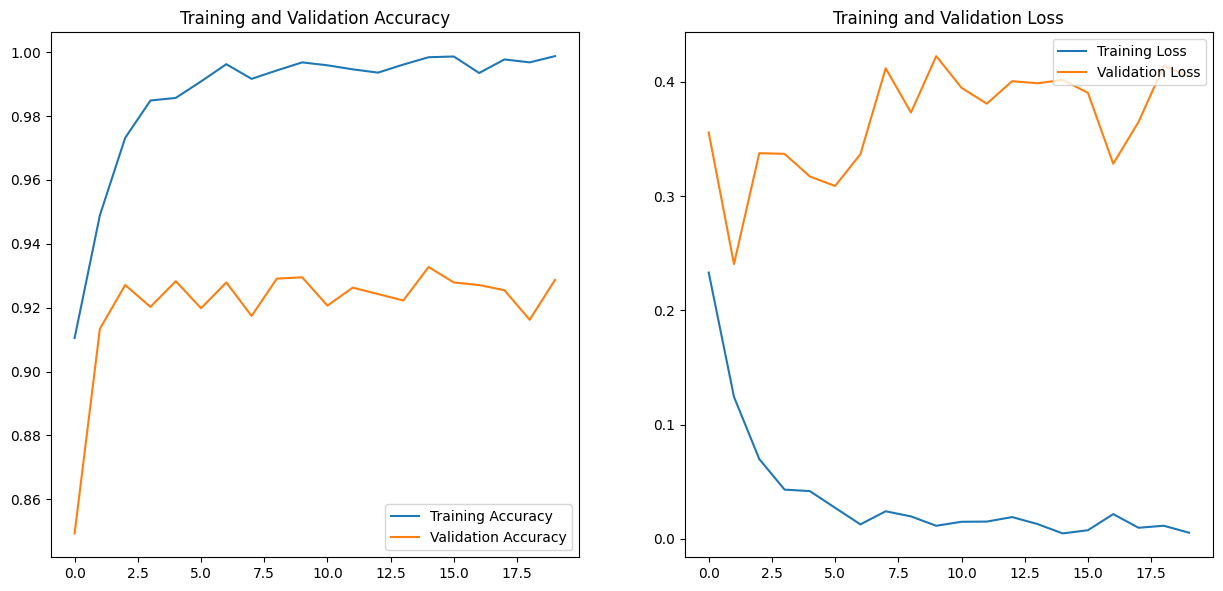

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()